**References:**

All the answers from questions 1 to 4 are inspired by Kaggle and ChatGPT.

1.https://chat.openai.com/

2.https://www.kaggle.com/


1. Implement an AI model using a framework of your choice (e.g., TensorFlow, PyTorch) to perform a
binary classification task. Describe your choices for the loss function, optimization algorithm, and
evaluation metrics. Please briefly explain how you handled any class imbalance, missing values, or other
pre-processing requirements.

Ans:

**Describe your choices for the loss function, optimization algorithm, and
evaluation metrics.**

The loss function used for training the models (Decision Trees within the BaggingClassifier) is not explicitly specified. The choice of the loss function depends on the algorithm used for training each Decision Tree. In scikit-learn's DecisionTreeClassifier, the default loss function for classification problems is the Gini impurity.
The Gini impurity is a measure of how often a randomly chosen element would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the node. The decision tree algorithm aims to split the data in a way that reduces the Gini impurity, leading to more pure nodes.

This code is performing hyperparameter tuning using GridSearchCV on a DecisionTreeClassifier, and then it uses a BaggingClassifier with the best hyperparameters found to train an ensemble of decision trees.


**Please briefly explain how you handled any class imbalance, missing values, or other pre-processing requirements.**

You will receive answers for each line of preprocessing code.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

In [ ]:
X_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
y_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gender_submission.csv')

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


From here we can see that there are null values in our Cabin and Age column but a better way to see this is by plotting heatmap using seaborn lib or by just getting info about the dataset.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

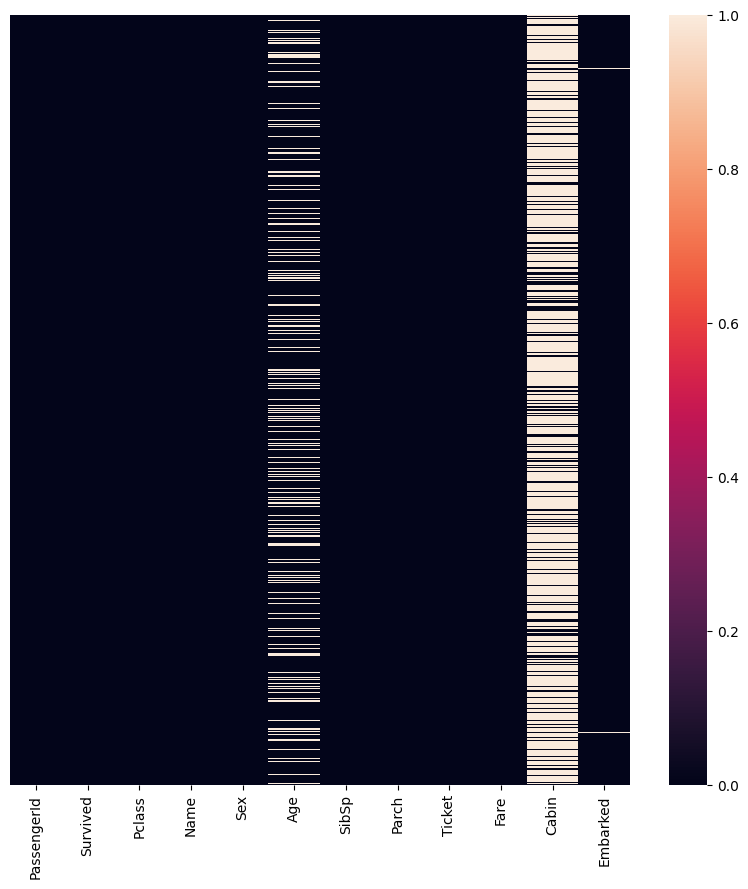

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(train.isnull(),yticklabels=False,cbar=True)

From here we can see that there are null values in Embarked column as well and we might want to remove this null values for a better result.

So lets deal with the Age dataset first and try to replace these NaN values with some values that can do well.One way to do so is to just replace the values with the mean of the ages of all but that will not be a good option as you will see further how the value changes.

Lets plot some of the graphs and identify the relationship of age with other features.

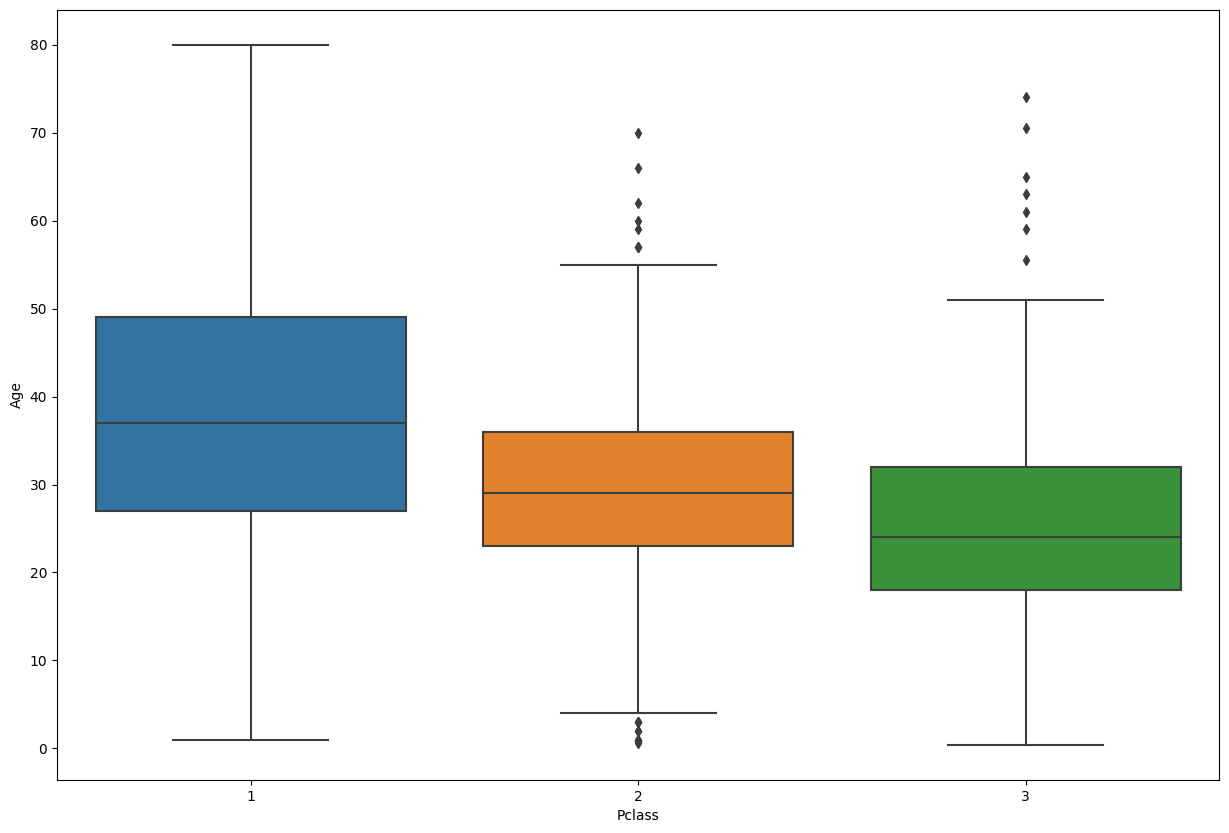

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Pclass', y='Age', data=train)
plt.show()

From this we can see that the average age for Pclass 1 is around 38 where as for other classes its 29 and 23 respectively. So just by doing the mean we would have replaced the value to 29.6 which would have not performed as good as this . So lets replace the NaN values with the values we found for each class.

In [ ]:
def Age_1(cols) :
    Age=cols[0]
    Pclass=cols[1]

    if pd.isnull(Age) :
        if Pclass==1 :
            return 38
        elif Pclass==2:
            return 29
        else :
            return 24
    else :
        return Age

In [ ]:
train['Age']=train[['Age','Pclass']].apply(Age_1,axis=1)

Here we have replaced the values of Age column with their respective mean values.

Now by seeing the data we can see that Passengerid, Cabin , Ticket, and Name is of no use for determining whether he survived or not .So lets just remove them from our train as well as test dataset.

In [ ]:
train.drop(['PassengerId','Ticket','Cabin','Name'],inplace=True,axis=1)

In [ ]:
X_test.drop(['PassengerId','Ticket','Cabin','Name'],inplace=True,axis=1)

Now there is NaN value in Embarked column and that also only two of them . So Just dropping these two values wont make much difference in our dataset.

In [ ]:
train=train.dropna(axis=0,how='any')

Lets see if our dataset contains any NaN values or not .


<Axes: >

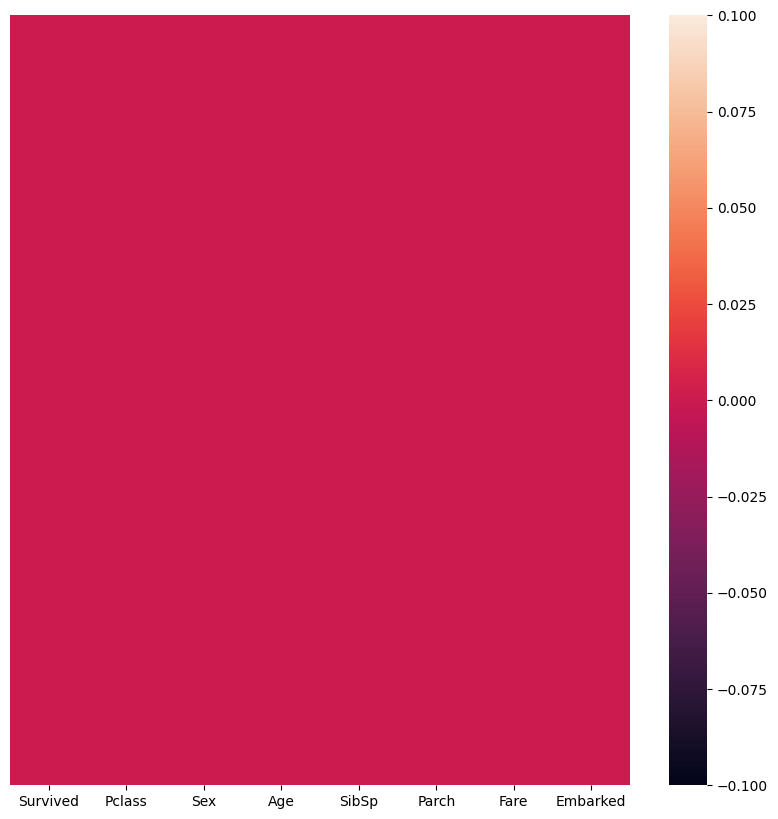

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(train.isnull(),yticklabels=False,cbar=True)

<Axes: xlabel='Pclass', ylabel='Age'>

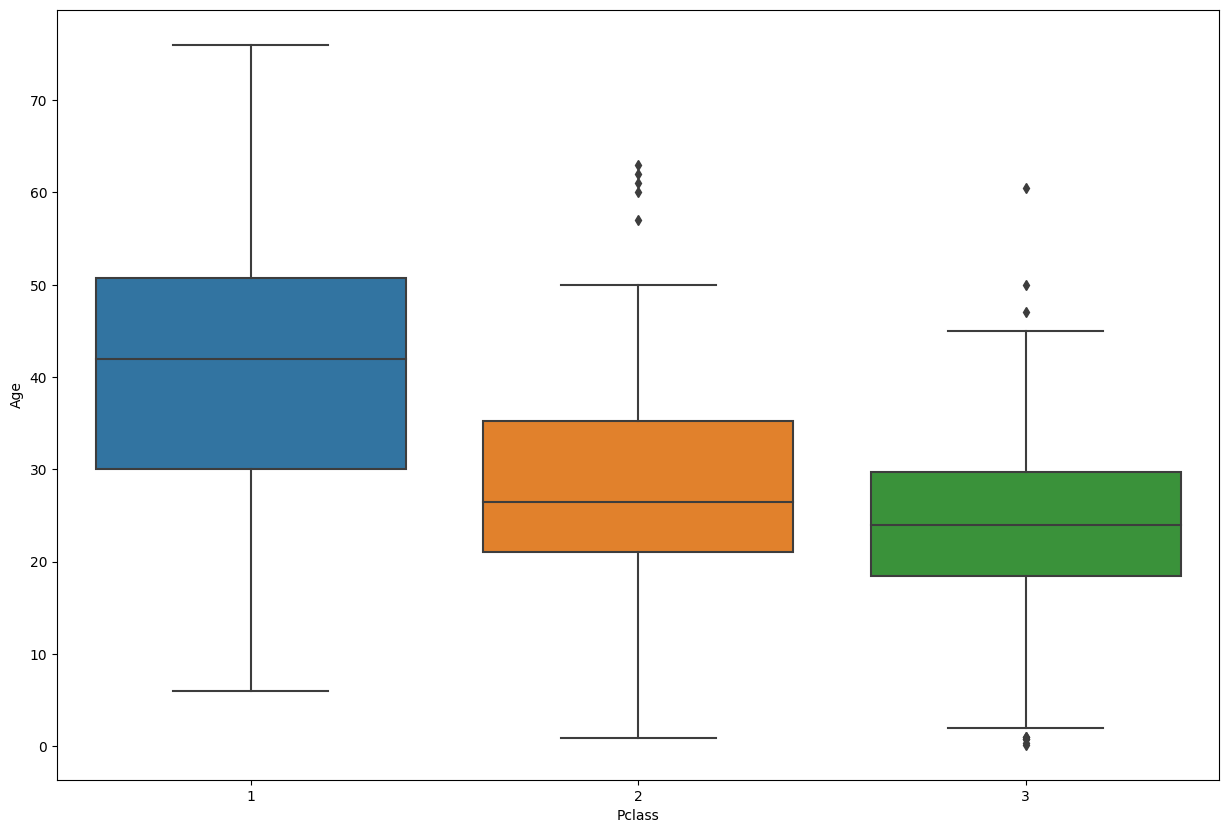

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Pclass', y='Age',data=X_test)

Here we will also have to remove the NaN values and replace it will other values and repeat the same steps on your X_test dataset also bcz it also contains null values. I have just done that in one cell but you can do it by following previous steps .

In [ ]:
def Age_1(cols) :
    Age=cols[0]
    Pclass=cols[1]

    if pd.isnull(Age) :
        if Pclass==1 :
            return 42
        elif Pclass==2:
            return 25
        else :
            return 22
    else :
        return Age

In [ ]:
X_test['Age']=X_test[['Age','Pclass']].apply(Age_1,axis=1)

Lets start visualising it in depth and get some insight out of it .


<Axes: xlabel='Survived', ylabel='count'>

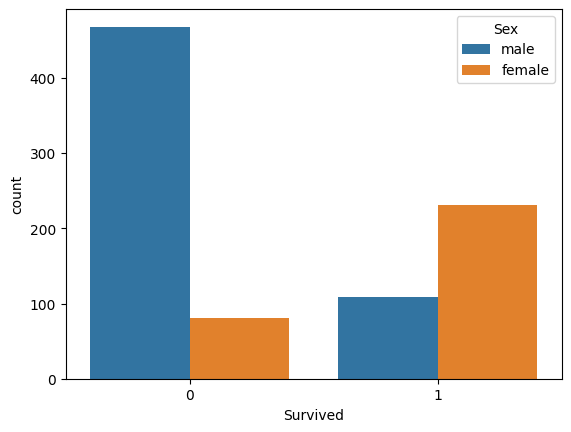

In [ ]:
sns.countplot(x='Survived',hue='Sex',data=train)

This clearly shows that a lot of females survived over males .



<Axes: xlabel='Pclass', ylabel='Fare'>

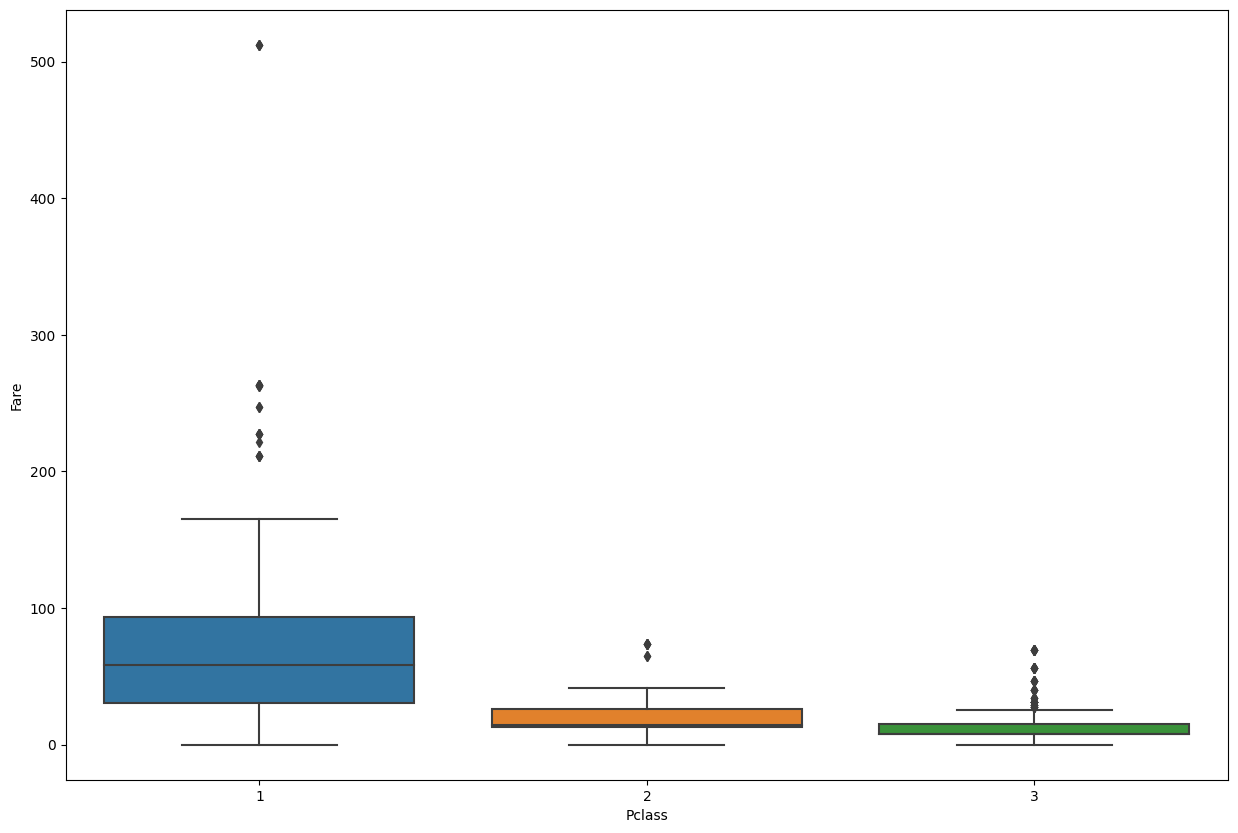

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Pclass', y='Fare',data=train)

This tells us that for Pclass 1 they actually paid higher money while other classes didnt pay much money but also Pclass 1 and 3 have a lotmore outliers that would led to overfitting so it must be taken care off.

<Axes: xlabel='Survived', ylabel='count'>

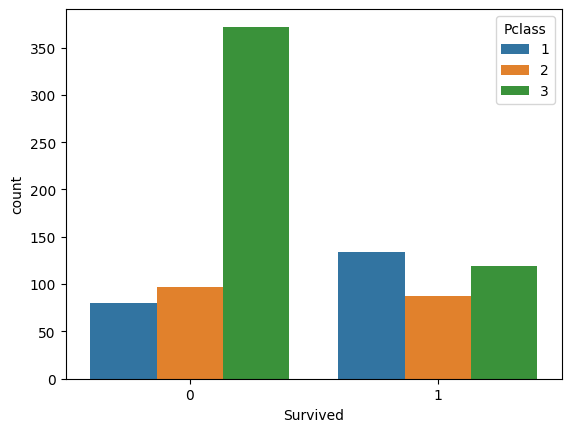

In [ ]:
sns.countplot(x ='Survived',hue='Pclass',data=train)

Survival rate of Pclass is much more than other but for Pclass 2 is almost the same and so by seeing this we cant just ignore the Fare feature and drop it and it is very crucial for further predictions.

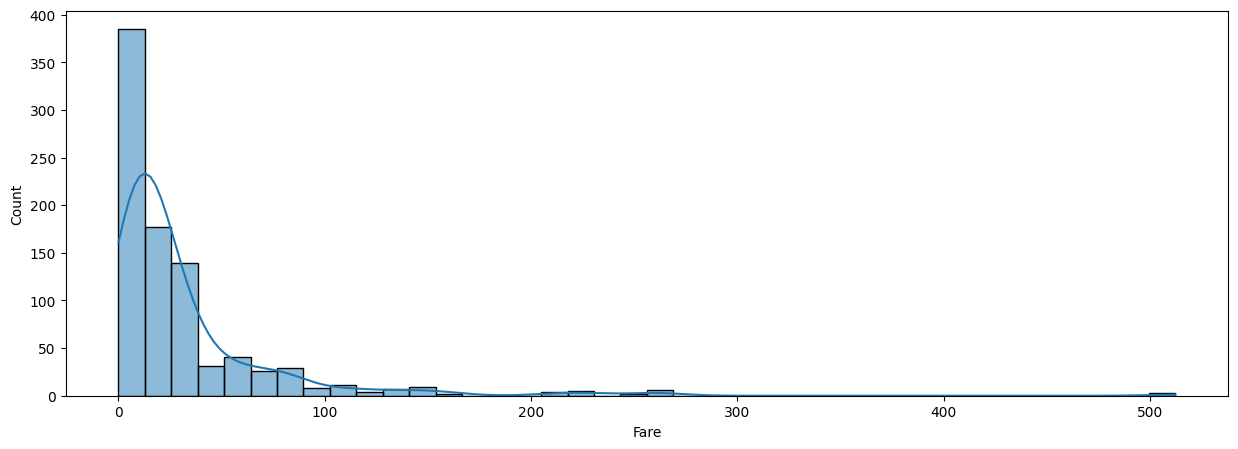

In [ ]:
plt.figure(figsize=(15, 5))
sns.histplot(train['Fare'], bins=40, kde=True)  # Use histplot instead of distplot
plt.show()

This doesnt look like a proper gaussian curve and might tend to overfit the curve as it has very less values of people survived for fare greater than 80$.

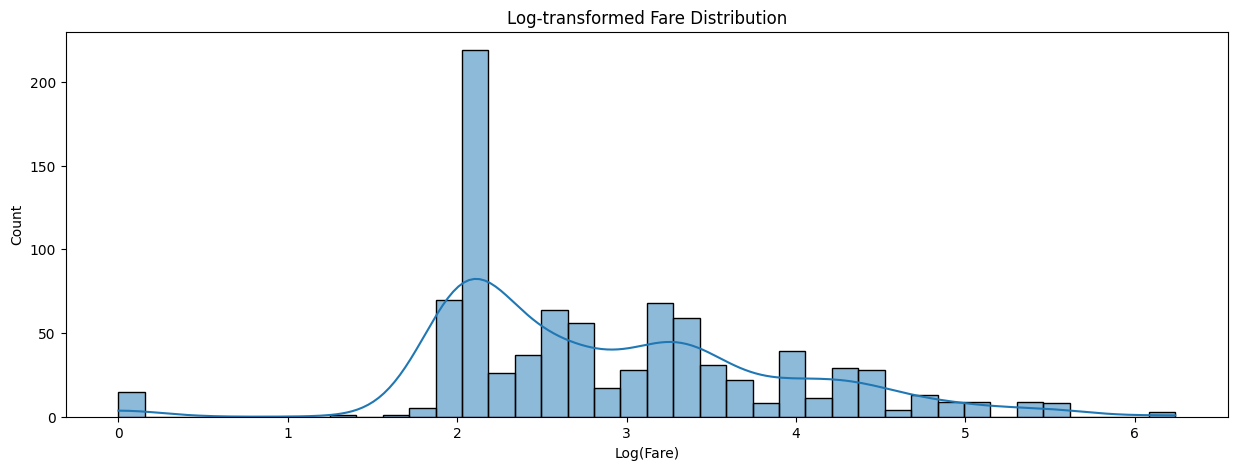

In [ ]:
train_fare = train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

plt.figure(figsize=(15, 5))
sns.histplot(train_fare, bins=40, kde=True)  # Use histplot instead of distplot
plt.title('Log-transformed Fare Distribution')
plt.xlabel('Log(Fare)')
plt.show()

Now we can see that the curve it equally distributed and will perfrom well under any classifier.



In [ ]:
fare=train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

Replacing the Fare values by their logerithmic values

Now lets replace the Embarked and Sex columns with their binary values

In [ ]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
emb=pd.get_dummies(train['Embarked'],drop_first=True)

In [ ]:
y_train=train['Survived']
train.drop(['Embarked','Sex','Survived','Fare'],inplace=True,axis=1)

The dummies are created and now the original dataset we need to concate with the newly created one


In [ ]:
X_train=pd.concat([train,sex,emb,fare],axis=1)

In [ ]:
y_test.drop('PassengerId',inplace=True,axis=1)

In [ ]:
X_train

,Pclass,Age,SibSp,Parch,male,Q,S,Fare
0,3,22.0,1,0,1,0,1,1.981001
1,1,38.0,1,0,0,0,0,4.266662
2,3,26.0,0,0,0,0,1,2.070022
3,1,35.0,1,0,0,0,1,3.972177
4,3,35.0,0,0,1,0,1,2.085672
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,1,0,1,2.564949
887,1,19.0,0,0,0,0,1,3.401197
888,3,24.0,1,2,0,0,1,3.154870
889,1,26.0,0,0,1,0,0,3.401197


This is our final dataset for training the dataset and same goes for y_train .

I have to perform the following steps on X_test i.e. test data as well bcz even it contains some of the data like this .Repeat the steps

In [ ]:
test_fare=X_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)


In [ ]:
test_sex=pd.get_dummies(X_test['Sex'],drop_first=True)
test_emb=pd.get_dummies(X_test['Embarked'],drop_first=True)
X_test.drop(['Embarked','Sex','Fare'],inplace=True,axis=1)
X_test=pd.concat([X_test,test_sex,test_emb,test_fare],axis=1)

In [ ]:
Y_test=pd.concat([X_test,test_sex,test_emb,test_fare,y_test],axis=1)
Y_test=Y_test.dropna(axis=0,how='any')

In [ ]:
y_test=Y_test['Survived']

Now, the only problem we would face is that our X_test contains 417 rows of data, whereas our y_test contains 418 rows of data. So, initially, while removing the NaN values from the fare dataset, we could have used OneHotEncoder for categorical data and IterativeImputer for numerical data to solve it. However, since it's just one value, another way is to concatenate it and then drop that value. This way, it will be removed from our y_test dataset as well.

Now our dataset preprocessing and visualisation is complete and now its time to use the proper method to train and test the dataset to get the best output.

**Using Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
lgr=LogisticRegression(max_iter=500)
lgr_train=lgr.fit(X_train,y_train)
y_pred = lgr.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.930622009569378
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       266
           1       0.90      0.91      0.91       152

    accuracy                           0.93       418
   macro avg       0.92      0.93      0.93       418
weighted avg       0.93      0.93      0.93       418

[[250  16]
 [ 13 139]]


**Using Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf=RandomForestClassifier(n_estimators=1000,max_leaf_nodes=16,n_jobs=-1)
rnd_clf.fit(X_train,y_train)
y_pred=rnd_clf.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8923444976076556
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       266
           1       0.93      0.76      0.84       152

    accuracy                           0.89       418
   macro avg       0.90      0.86      0.88       418
weighted avg       0.90      0.89      0.89       418

[[258   8]
 [ 37 115]]


3. Demonstrate your ability to optimize a model's performance (in terms of accuracy and speed) through hyperparameter tuning.

Ans:

**Using Bagging technique**

Also i used GridSearch to select proper hyperparameters, and the results are significantly better than before.

In the below section, you will find the demostration.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [ ]:
params = [{'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}]
b_clf=BaggingClassifier(GridSearchCV(DecisionTreeClassifier(random_state=42),params,cv=3,verbose=1),n_estimators=1000,max_samples=100,bootstrap=True,n_jobs=-1)
b_clf.fit(X_train,y_train)
y_pred=b_clf.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.992822966507177
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       266
           1       1.00      0.98      0.99       152

    accuracy                           0.99       418
   macro avg       0.99      0.99      0.99       418
weighted avg       0.99      0.99      0.99       418

[[266   0]
 [  3 149]]


4. Given a set of performance metrics from your AI model (e.g., precision, recall, F1 score), how would you
analyze and interpret these results? What conclusions can you draw about the model’s effectiveness, its
potential biases, and areas of improvement?

Ans:

**Here's the analysis:**

**Overall Effectiveness:**

The model shows high precision, recall, and F1-score for both classes. This suggests that the model is performing well in terms of both identifying positive instances (Class 1) and negative instances (Class 0).

**Class-specific Analysis:**
For Class 0, the model has very high precision (99%) and recall (100%), indicating that it correctly identifies and rarely misclassifies negative instances.
For Class 1, the model has slightly lower recall (98%) compared to precision (100%), suggesting that it may miss a small percentage of positive instances, but the positive predictions it makes are highly accurate.

**Potential Biases:**
The metrics provided do not explicitly reveal biases, but it's essential to consider the distribution of the classes and potential biases in the dataset.
The analysis should be extended to explore performance across different demographic groups or other relevant subgroups to identify biases.

**Areas of Improvement:**
Despite high performance, there's always room for improvement. Investigate instances where the model makes mistakes, especially false positives or false negatives, to understand patterns and potential areas for enhancement.
Consider collecting more diverse or representative data to ensure the model's robustness across various scenarios.

**Support:**
Class 0 has a higher support (266 instances) compared to Class 1 (152 instances). It's important to consider the class distribution when interpreting performance metrics, especially in imbalanced datasets.

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

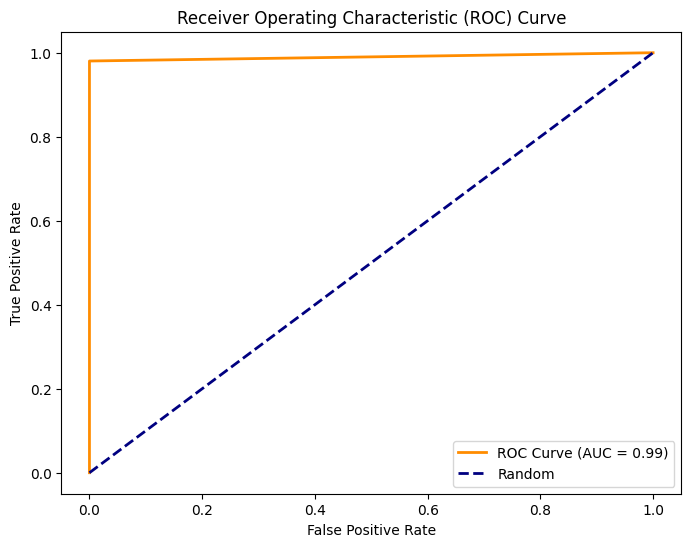

In [ ]:
#Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the Area Under the Curve (AUC)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

2. Implement a function to explain the AI model's decisions using a model interpretability method (e.g.,
SHAP, LIME). Briefly explain your chosen method and provide a use case where this method can
effectively improve model transparency and accountability.

Ans:

Chosen Method (SHAP): SHAP is a model-agnostic approach for explaining the output of any machine learning model. It assigns each feature an importance value for a particular prediction. SHAP values are based on cooperative game theory, specifically the Shapley values concept, and provide a fair way to distribute the "credit" for a prediction among the features.

**Use Case:**
Imagine you are working on a credit scoring model for a financial institution. The model determines whether a customer is likely to default on a loan based on various features like income, credit score, and debt-to-income ratio.

In this case, understanding the factors contributing to a specific credit decision is crucial for transparency and accountability. Using SHAP, you can explain how each feature influences the model's decision for an individual applicant. This transparency can be valuable for both customers and regulators who want to understand the model's reasoning behind approving or denying a loan.
By visualizing SHAP values, stakeholders can gain insights into which features had the most significant impact on a decision, promoting transparency and accountability in the lending process.

In [ ]:
import shap


  0%|          | 0/1 [00:00<?, ?it/s]

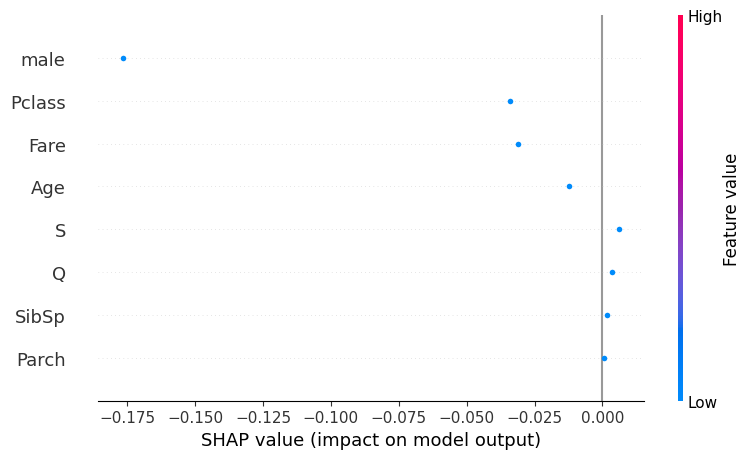

In [ ]:
# Create a SHAP KernelExplainer object
explainer = shap.KernelExplainer(b_clf.predict_proba, X_train)

# Choose a subset of the test set for explanation
subset_index = 0  # Choose a specific instance from the test set
X_subset = X_test.iloc[subset_index:subset_index + 1, :]

# Calculate SHAP values for the chosen instance
shap_values = explainer.shap_values(X_subset, nsamples=100)

# Summarize the feature importance
shap.summary_plot(shap_values[1], X_subset)
